# **Import Needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
pip install alibi


In [ ]:
df = pd.read_csv("/content/Super_Store_Data_After_EDA (1).csv", encoding='latin1')

**Spliting the Data**

In [ ]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Sales'].median()
df['Hights_Sales'] = (df['Sales'] >= median_sales).astype(int)

In [ ]:
print(df['Hights_Sales'].value_counts())    #Assumption one (Appropriate Outcome Type)

Hights_Sales
1    2055
0      65
Name: count, dtype: int64


In [ ]:
x = df.drop(['Sales','Hights_Sales'], axis=1)
y = df['Hights_Sales']

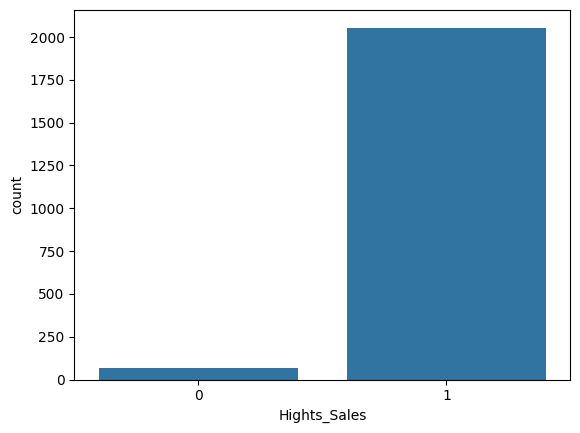

In [ ]:
sns.countplot(x='Hights_Sales', data=df)
plt.show()

In [ ]:
resambel = RandomOverSampler(random_state=42)
X_resampled, y_resampled = resambel.fit_resample(x, y)
print(y_resampled.value_counts())

Hights_Sales
1    2055
0    2055
Name: count, dtype: int64


In [ ]:
balanced_df = pd.DataFrame(X_resampled, columns=x.columns)
balanced_df['Hights_Sales'] = y_resampled

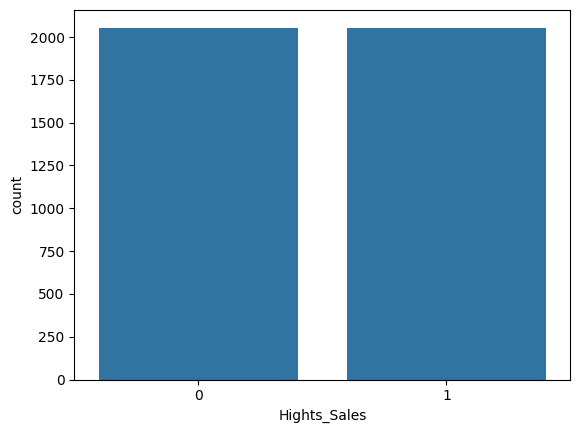

In [ ]:
sns.countplot(x='Hights_Sales', data=balanced_df)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Trian the data**

In [ ]:
#Standarized the numerical col
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c1365b13f2c85f7305352efedd909673b19de0d45320b33852fd43ce359fbbb6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)

In [ ]:
X_resampled_lstm = X_resampled.values
X_resampled_lstm = np.reshape(X_resampled_lstm, (X_resampled_lstm.shape[0], X_resampled_lstm.shape[1], 1))

In [ ]:
# Split into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_resampled_lstm, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5596 - loss: 0.6790 - val_accuracy: 0.6411 - val_loss: 0.6215
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6367 - loss: 0.6268 - val_accuracy: 0.6800 - val_loss: 0.5742
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6709 - loss: 0.5842 - val_accuracy: 0.6837 - val_loss: 0.5436
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7057 - loss: 0.5429 - val_accuracy: 0.7445 - val_loss: 0.4965
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7590 - loss: 0.4903 - val_accuracy: 0.8200 - val_loss: 0.4028
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8161 - loss: 0.3968 - val_accuracy: 0.8723 - val_loss: 0.3059
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9112 - loss: 0.2477 - val_accuracy: 0.9343 - val_loss: 0.1902
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9346 - loss: 0.2036 - val_accu

#**3- LSTM Model Training**

In [ ]:
# Evaluate the model
lstm_preds = lstm_model.predict(X_test_lstm)
lstm_preds = (lstm_preds > 0.5).astype(int)

print("LSTM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_lstm, lstm_preds):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_lstm, lstm_preds)}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Model Evaluation:
Accuracy: 0.9477
Confusion Matrix:
[[385   0]
 [ 43 394]]


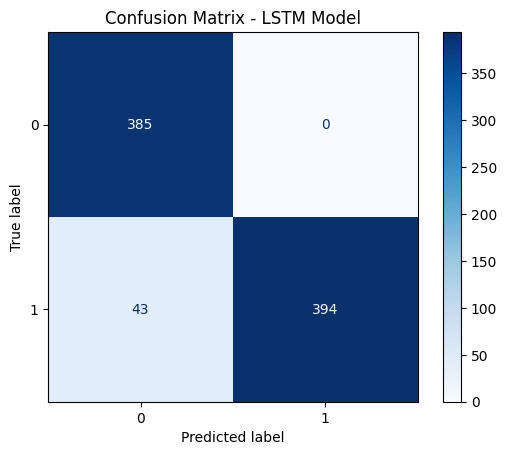

In [ ]:
cm = confusion_matrix(y_test_lstm, lstm_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix - LSTM Model")
plt.show()

#**Explainability Techniques:-**

#**1- PDP Plots For LSTM**

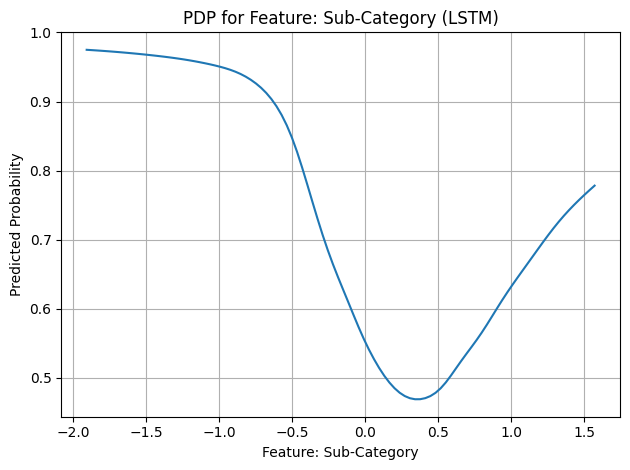

In [ ]:
feature_name = X_test.columns[9]
if feature_name not in X_test.columns:
    raise ValueError(f"'{feature_name}' not found in X_test columns.")

feature_idx = X_test.columns.get_loc(feature_name)
X_test_array = X_test.values

def plot_lstm_pdp(model, X_test_array, feature_idx, feature_name):
    feature_values = np.linspace(X_test_array[:, feature_idx].min(), X_test_array[:, feature_idx].max(), num=100)
    pred_values = []
    for val in feature_values:
        X_copy = X_test_array.copy()
        X_copy[:, feature_idx] = val
        X_copy_reshaped = np.reshape(X_copy, (X_copy.shape[0], X_copy.shape[1], 1))
        preds = model.predict(X_copy_reshaped, verbose=0)
        pred_values.append(np.mean(preds))
    plt.plot(feature_values, pred_values, label=f"PDP for {feature_name}")
    plt.xlabel(f"Feature: {feature_name}")
    plt.ylabel("Predicted Probability")
    plt.title(f"PDP for Feature: {feature_name} (LSTM)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_lstm_pdp(lstm_model, X_test_array, feature_idx, feature_name)


#**2- ICE Plots For LSTM**

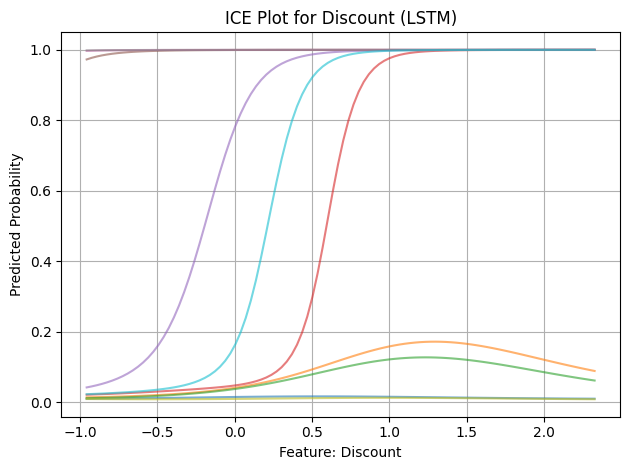

In [ ]:
def plot_lstm_ice(model, X_test_array, feature_idx, feature_name, n_samples=10):
    sample_indices = np.random.choice(range(X_test_array.shape[0]), size=n_samples, replace=False)
    feature_values = np.linspace(X_test_array[:, feature_idx].min(), X_test_array[:, feature_idx].max(), num=100)

    for idx in sample_indices:
        single_sample = np.tile(X_test_array[idx], (100, 1))
        single_sample[:, feature_idx] = feature_values
        reshaped_sample = single_sample.reshape(100, X_test_array.shape[1], 1)
        preds = model.predict(reshaped_sample, verbose=0)
        plt.plot(feature_values, preds, alpha=0.6)

    plt.xlabel(f"Feature: {feature_name}")
    plt.ylabel("Predicted Probability")
    plt.title(f"ICE Plot for {feature_name} (LSTM)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

feature_name = X_train.columns[11]
feature_idx = X_train.columns.get_loc(feature_name)
X_test_array = X_test.values

plot_lstm_ice(lstm_model, X_test_array, feature_idx, feature_name)


#**3- ALE Plots For LSTM**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


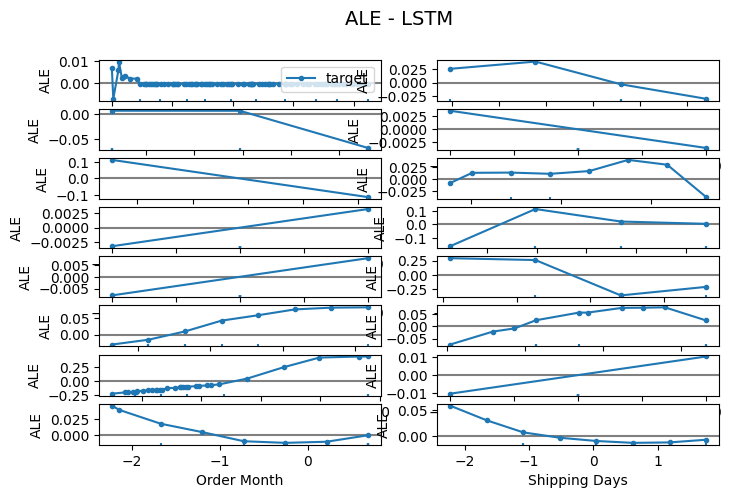

In [ ]:
def lstm_proba(X):
    X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
    return lstm_model.predict(X_reshaped, verbose=0)

ale_lstm = ALE(
    lstm_proba,
    feature_names=X_train.columns.tolist(),
    target_names=["target"]
)

exp_lstm = ale_lstm.explain(X_train.values)

plot_ale(exp_lstm, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)
plt.suptitle("ALE - LSTM", fontsize=14)
plt.show()


#**4- Permutation Importance For LSTM**

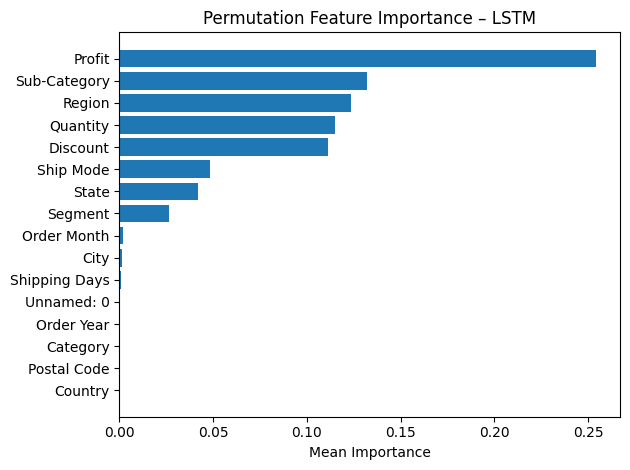

In [ ]:
def lstm_predict(X):
    X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
    preds = lstm_model.predict(X_reshaped, verbose=0)
    return (preds > 0.5).astype(int).flatten()

def custom_scorer(estimator, X, y):
    preds = lstm_predict(X)
    return (preds == y).mean()

result_lstm = permutation_importance(
    estimator=lstm_model,
    X=X_test.values,
    y=y_test,
    n_repeats=10,
    random_state=42,
    scoring=custom_scorer
)

sorted_idx_lstm = result_lstm.importances_mean.argsort()

plt.barh(X_test.columns[sorted_idx_lstm], result_lstm.importances_mean[sorted_idx_lstm])
plt.title("Permutation Feature Importance – LSTM")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

#**5- Lime For LSTM**

In [ ]:
def lstm_predict_proba(X):
    X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
    preds = lstm_model.predict(X_reshaped, verbose=0)
    return np.hstack([(1 - preds), preds])

explainer_lstm = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["0", "1"],
    mode='classification'
)

i = 7
exp_lstm = explainer_lstm.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=lstm_predict_proba
)

exp_lstm.show_in_notebook(show_table=True)